# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here. 

student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

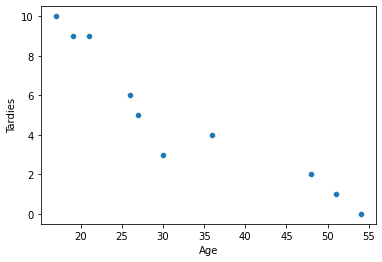

In [5]:
sns.scatterplot(x=student_data['Age'], y=student_data['Tardies']);

# Your code here.

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, it seems that there is an inverse correlation between the age of the students and the number of tardies registered. Accordingly to the graph, we could concluide that as they get older, there tend to attend to class on time.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
Covariance = np.cov(student_data['Age'], student_data['Tardies'], bias=True)[0][1]
print(Covariance)

-41.01


In [16]:
Correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0][1]
print(Correlation)

-0.9391626886887122


While the covariance indicates the level to which the variables Age and Tardies vary together, the correlation measures the degree to which these two variables move in relation to each other.

The covariance between these two variables is -41.01, suggesting the variables change in the opposite direction

We can see that the two variables are negatively correlated and as the correlation is -0.9391626886887122, this suggests a high level of correlation.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [28]:
# Your response here.

lr = LinearRegression()

lr.fit(X=student_data.Age.to_frame(), y=student_data.Tardies)

print(lr.intercept_, lr.coef_[0])
#  n (ordenada origen), m (pendiente)

12.888803363135768 -0.2428207709159808


$$Tardies = (-0.2428207709159808) * Age + (12.888803363135768) $$

Plot your regression model on your scatter plot.

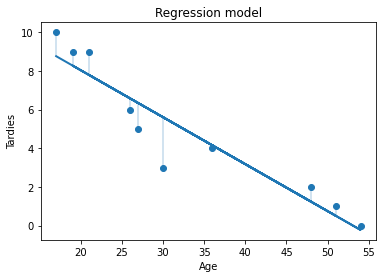

In [27]:
fig, ax1 = plt.subplots(1, 1)

y_hat = lr.intercept_ + lr.coef_[0] * student_data.Age

ax1.scatter(student_data.Age, student_data.Tardies)

ax1.plot(student_data.Age, y_hat, lw=2)

ax1.vlines(student_data.Age, y_hat, student_data.Tardies, lw=0.4)

ax1.set_xlabel('Age')
ax1.set_ylabel('Tardies')
ax1.set_title('Regression model');

In [34]:
mean_prediction = [student_data.Tardies.mean()] * 10

TSS = ((student_data.Tardies - mean_prediction) ** 2).sum()

RSS = ((student_data.Tardies - y_hat) ** 2).sum()

R_2 = 1 - (RSS / TSS)
R_2

0.8820265558250109

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

    Based on the results of this model, it is possible to infer that 88% of the proportion of variability in Tardies that can be explained depending on the Age of the students. As shown previosuly, we were pretty sure the older the students get, the more puntual they show up to class, so I'm pretty confident supporthing this statement.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
# Import any libraries you may need & the data

df_vehicles = pd.read_csv('../lab-regression-analysis/vehicles.csv')
df_vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [77]:
df_vehicles2 = df_vehicles.rename(columns = {'Engine Displacement': 'Engine_Displacement', 'Fuel Cost/Year': 'Fuel_Cost_Year', 'CO2 Emission Grams/Mile': 'CO2_Emission_Grams_Mile', 'Fuel Barrels/Year': 'Fuel_Barrels_Year', 'Combined MPG': 'Combined_MPG',})
df_vehicles2

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel_Barrels_Year,City MPG,Highway MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [59]:
# Your response here. 

result1 = smf.ols('CO2_Emission_Grams_Mile ~ Year', data=df_vehicles2).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1869.
Date:                     Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                             23:19:17   Log-Likelihood:            -2.2194e+05
No. Observations:                    35952   AIC:                         4.439e+05
Df Residuals:                        35950   BIC:                         4.439e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5725.8633    121.455     47.144      0.000    5487.807    5963.920
Year          -2.6243      0.061    -43.231      0.000      -2.743      -2.505
==============================================================================
Omnibus:                     3079.952   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4482.385
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.053   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
result2 = smf.ols('CO2_Emission_Grams_Mile ~ Cylinders', data=df_vehicles2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.566
Model:                                 OLS   Adj. R-squared:                  0.566
Method:                      Least Squares   F-statistic:                 4.690e+04
Date:                     Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                             23:19:39   Log-Likelihood:            -2.0784e+05
No. Observations:                    35952   AIC:                         4.157e+05
Df Residuals:                        35950   BIC:                         4.157e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.0946      1.420    127.520      0.000     178.311     183.878
Cylinders     51.0352      0.236    216.569      0.000      50.573      51.497
==============================================================================
Omnibus:                     4434.518   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11452.248
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.382   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
result3 = smf.ols('CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year', data=df_vehicles2).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                             23:20:36   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
result4 = smf.ols('CO2_Emission_Grams_Mile ~ Combined_MPG', data=df_vehicles2).fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.858
Method:                      Least Squares   F-statistic:                 2.170e+05
Date:                     Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                             23:22:21   Log-Likelihood:            -1.8778e+05
No. Observations:                    35952   AIC:                         3.756e+05
Df Residuals:                        35950   BIC:                         3.756e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      905.2031      0.953    950.221      0.000     903.336     907.070
Combined_MPG   -21.5706      0.046   -465.877      0.000     -21.661     -21.480
==============================================================================
Omnibus:                    23856.426   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380865.584
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      17.770   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
result5 = smf.ols('CO2_Emission_Grams_Mile ~ Fuel_Cost_Year', data=df_vehicles2).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 2.334e+05
Date:                     Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                             23:22:19   Log-Likelihood:            -1.8665e+05
No. Observations:                    35952   AIC:                         3.733e+05
Df Residuals:                        35950   BIC:                         3.733e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         61.5631      0.887     69.430      0.000      59.825      63.301
Fuel_Cost_Year     0.2186      0.000    483.072      0.000       0.218       0.220
==============================================================================
Omnibus:                     1566.464   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.699
Skew:                          -0.399   Prob(JB):                    3.65e-288
Kurtosis:                       2.502   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
corr_vehicles = df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

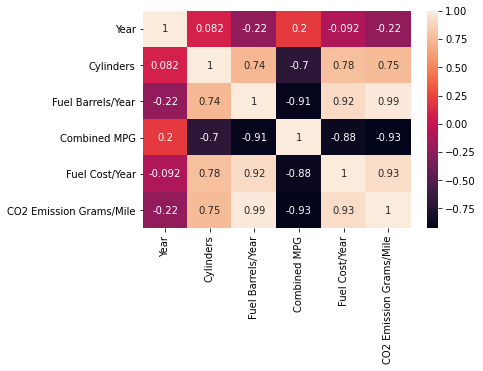

In [74]:
sns.heatmap(corr_vehicles.corr(), annot = True);


Accordingly to the R-squared value of each linear regretion between the variables selected and the outcome, the variable that explains better the variability in CO2 Emission Grams/Mile is the Fuel Barrels/Year variable and to support this result, we can see that the two variables are positively correlated and that the correlation  close to 1.0. This suggests a high level of correlation.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [78]:
# Your response here. 

result6 = smf.ols('CO2_Emission_Grams_Mile ~ Year + Engine_Displacement + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year', data=df_vehicles2).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.982
Model:                                 OLS   Adj. R-squared:                  0.982
Method:                      Least Squares   F-statistic:                 3.234e+05
Date:                     Wed, 21 Apr 2021   Prob (F-statistic):               0.00
Time:                             07:56:06   Log-Likelihood:            -1.5082e+05
No. Observations:                    35952   AIC:                         3.017e+05
Df Residuals:                        35945   BIC:                         3.017e+05
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             899.2525     19.149     46.961      0.000     861.720     936.785
Year                   -0.3849      0.010    -40.196      0.000      -0.404      -0.366
Engine_Displacement     7.0696      0.164     43.023      0.000       6.748       7.392
Cylinders              -2.0099      0.121    -16.553      0.000      -2.248      -1.772
Fuel_Barrels_Year      18.2163      0.063    290.432      0.000      18.093      18.339
Combined_MPG           -2.8229      0.042    -67.707      0.000      -2.905      -2.741
Fuel_Cost_Year          0.0368      0.000     76.359      0.000       0.036       0.038
==============================================================================
Omnibus:                    68264.909   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        195962902.671
Skew:                          14.557   Prob(JB):                         0.00
Kurtosis:                     363.512   Cond. No.                     6.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$ CO2 Emission Grams/Mile = (899.2525) +  Year * (-0.3849) + Engine Displacement * (7.0696) + Cylinders * (-2.0099) + Fuel Barrels/Year * (18.2163) + Combined MPG * (-2.8229) + Fuel Cost/Year * (0.0368) $$

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

Based on the results of the model, the most important variables are Fuel Barrels/Year and Engine Displacement. The R-squared and adj. R-squared values are 0.982, which means that the model is explains in 98% the variability in CO2 Emission Grams/Mile. This is siginificantly representative and as all the P>|t| values are equal to 0.000, we can concluide that the variables are significant.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 